<a href="https://colab.research.google.com/github/christofw/chord_eval/blob/main/analyze_CASD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
# !pip install jams
# !pip install libfmp
# !pip install wget
import numpy as np, os, scipy
import pandas as pd
from matplotlib import pyplot as plt
import librosa
import libfmp
import jams
import mir_eval
import urllib.request as urll
import wget

## Load Chordify Annotator Subjectivity Dataset
... and corresponding functions

617


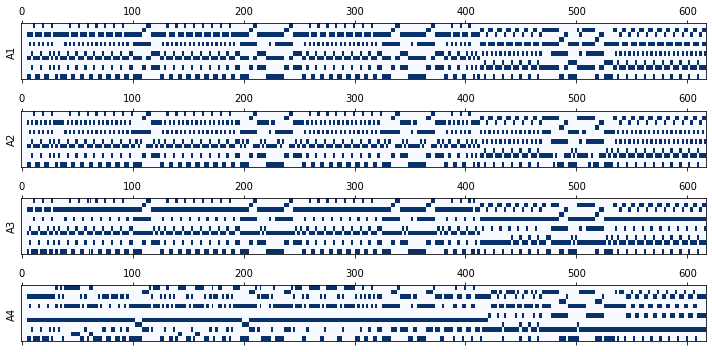

In [77]:
# !git clone https://github.com/chordify/CASD.git

# create chroma from chord label
def labchroma(l):
    r,c,b = mir_eval.chord.encode(l)
    return np.roll(c,r)

# plot the chromas of the annotators of song s
def plotchroma(filename):
    jam = jams.load(filename)

    nannotations = len(jam['annotations'])
    f, axarr = plt.subplots(nannotations, sharex=False, sharey=True, figsize=(10, 5))
    for (ann, ax) in zip(jam['annotations'],axarr):
        chroma = np.array([labchroma(lab.value) for lab in ann.data])
        im = ax.matshow(chroma.T, aspect='auto', cmap=plt.cm.Blues)
        ax.set_ylabel(ann.annotation_metadata.annotator.id)
        ax.get_yaxis().set_ticks([])
    f.tight_layout()
    
filename = os.path.join('CASD', 'jams', '1012.jams')
jam = jams.load(filename)
ann1 = jam['annotations'][0]['data']
print(len(ann1))

plotchroma(filename)